## Sentiment Analysis on Reviews 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding



In [3]:
amazondata = []
with open("./Amazon_Data.txt") as f: 
    for line in f: 
        line = line.replace("__label__2 ", "positive\t")
        line = line.replace("__label__1 ", "negative\t")
        amazondata.append(line.split("\t"))
        # re.sub(r"__label_2 ", "positive\t", line)
        # re.sub(r"__label__1", "negative\t", line)
        #break
        
#print(amazondata)
review_df = pd.DataFrame(amazondata)
review_df.columns = ["sentiment", 'text']
#df.head
review_df = review_df.sample(13864, random_state=1)

review_df.head()
review_df['sentiment'].value_counts()
sentiment_label = review_df.sentiment.factorize()
sentiment_label
review = review_df.text.values
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [4]:
#process movie data
moviedata = []
with open("./Rateitall_Data.txt") as f: 
    for line in f: 
        moviedata.append(line.split("\t"))
        # re.sub(r"__label_2 ", "positive\t", line)
        # re.sub(r"__label__1", "negative\t", line)
        #break
        
#print(amazondata)
review_df = pd.DataFrame(moviedata)
review_df.columns = ["sentiment", 'text']
#df.head
review_df = review_df.sample(13864, random_state=1)

review_df.head()
review_df['sentiment'].value_counts()
sentiment_label = review_df.sentiment.factorize()
sentiment_label
review = review_df.text.values
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [11]:
#process twitter data
df = pd.read_csv("./Tweet_Data.csv")
df.head()
df.columns
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)
tweet_df["airline_sentiment"].value_counts()
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

(14640, 2)
(11541, 2)


In [2]:
#process reddit data
df = pd.read_csv("./Reddit_Data.csv")
df.head()
df.columns
tweet_df = df[['clean_comment','category']]
print(tweet_df.shape)
tweet_df.head(5)
tweet_df = tweet_df[tweet_df['category'] != 0]
print(tweet_df.shape)
tweet_df.head(5)
tweet_df["category"].value_counts()
sentiment_label = tweet_df.category.factorize()
sentiment_label

tweet = tweet_df.clean_comment.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

(37249, 2)
(24107, 2)


In [20]:
print(tokenizer.word_index)

In [ ]:
print(tweet[0])
print(encoded_docs[0])

In [47]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   87   60  138  273   10  132  862    6   13  618    5  126
 6833    7    1 6834  283  203   17    6   13  164    6   14   80 1298
   28   15   21  104  503    5  120    7   17 3546   11   75    1  115
 1502    7 3937 1150   41   50  559   84  128   37  456   15   23   15
   47 

In [3]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-28 11:32:49.212569: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-28 11:32:49.213338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1484384   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,501,035
Trainable params: 1,501,035
Non-trainable params: 0
______________________________________________

In [4]:
with tf.device('/cpu:0'):
    history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5


2023-04-28 11:32:52.639406: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-28 11:32:53.427928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.7372

2023-04-28 11:34:42.473002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - 123s 203ms/step - loss: 0.5329 - accuracy: 0.7372 - val_loss: 0.3687 - val_accuracy: 0.8507
Epoch 2/5
603/603 [==============================] - 122s 201ms/step - loss: 0.3271 - accuracy: 0.8692 - val_loss: 0.3078 - val_accuracy: 0.8779
Epoch 3/5
603/603 [==============================] - 121s 201ms/step - loss: 0.2619 - accuracy: 0.8961 - val_loss: 0.2982 - val_accuracy: 0.8812
Epoch 4/5
603/603 [==============================] - 121s 200ms/step - loss: 0.2268 - accuracy: 0.9151 - val_loss: 0.2919 - val_accuracy: 0.8849
Epoch 5/5
603/603 [==============================] - 121s 200ms/step - loss: 0.1998 - accuracy: 0.9243 - val_loss: 0.2890 - val_accuracy: 0.8849


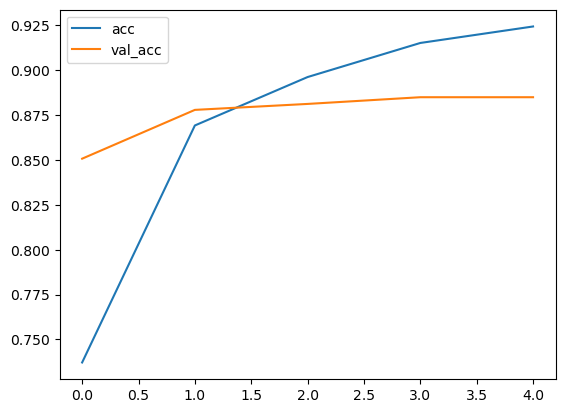

<Figure size 640x480 with 0 Axes>

In [5]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Amazon Review Accuracy plot.jpg")

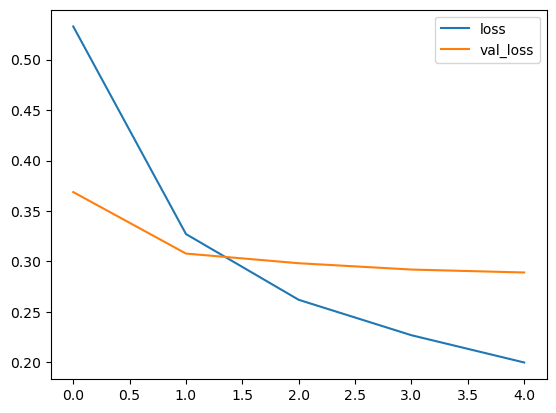

<Figure size 640x480 with 0 Axes>

In [6]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Amazon Review Loss plot.jpg")

In [7]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [8]:
test_sentence1 = "Still waiting on bags from flight 1613/2440 yesterday  First Class passenger not happy with your service."
predict_sentiment(test_sentence1)

test_sentence2 = "So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America."
predict_sentiment(test_sentence2)

2023-04-28 11:43:39.510421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Predicted label:  1
1/1 [==============================] - 2s 2s/step
Predicted label:  1
